<a href="https://colab.research.google.com/github/pietroventurini/machine-learning-notes/blob/master/6.1%20-%20Feedforward%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedforward Neural Networks

## Contents
1. [**Introduction**](#Introduction)  
    1.1. The sigmoid unit  
    1.2. The Rectified Linear Unit (ReLU)  
2. [**Multi-layer neural networks**](#Multi-layer-neural-networks)  
    2.1. Learning a XOR function  
    2.2. Visual interpretation  
    2.3. Generalization and vectorized notation  
3. [**The Backpropagation Algorithm**](#The-Backpropagation-Algorithm)  
    3.1. Computing the partial derivatives  
    3.2. Backpropagation with vectorized input  
    3.3. What happens in each layer?  
    3.4. Initialization  
    3.5. Best practices  

# Introduction
A **feedforward neural network**, also called **multilayer perceptron** (MLP), is a type of **artificial neural network** (ANN) wherein connections between nodes do not form a cycle (differently from its descendant: the *recurrent neural network*). Its goal is to approximate some function $f^*$ by defining a mapping $y=f(x;w)$ and learning the value of the parameters $w$ that result in the best approximation of $f^*$. It is called *feedforward* because information flows from the input layer $x$, through the intermediate layers, to the output $y$, without any *feedback* connections where the outputs are fed back into the network. Before talking about networks, we have to introduce the units that will make up the network.

### The sigmoid unit
Let's first introduce a "building block" for our neural network: the **sigmoid unit**. It is simply an artificial neuron in which the activation function is a sigmoid function (which has already been introduced in the chapter about Logistic Regression).

<img src="images/neural_networks/sigmoid_unit.jpg" style="width:45em; display: block; margin-left: auto; margin-right: auto;"/>

Differently from the perceptron, which doesn't distinguish between points that lie close to the boundary and points that lie far, the sigmoid neuron outputs a value between 0 and 1. So, if we think of a classification model composed by only one sigmoid unit, we can consider the output value as the probability of the input point to be classified as positive.

The sigmoid function is monotonic and continuously differentiable, so we can use gradient descent methods to "train" a single sigmoid unit and an algorithm called **backpropagation** to train a network of units.

The cost function is, again:

$$J(w)=\frac{1}{2}\sum_{i}{\left(y^{(i)}-\sigma\left(z^{(i)}\right)\right)^2}$$

$\sigma(z)$ is the sigmoid function and its derivative is $\frac{\partial}{\partial z}{\sigma(z)} = \sigma(z)\left(1-\sigma(z)\right)$. Its argument, $z^{(i)}=w^\top x^{(i)}$, is the linear combination between the weights vector $w$ and the *i*-th input $x^{(i)}$. The partial derivative of $z$ with respect to the *j*-th parameter $w_j$ is simply $\frac{\partial}{\partial w_j}{z^{(i)}} = x_{j}^{(i)}$.

The derivative of $J$ with respect to $w_j$ is then:

$$\begin{split}
    \frac{\partial J}{\partial w_j} &= \frac{\partial}{\partial w_j} \frac{1}{2}\sum_{i}{\left(y^{(i)}-\sigma\left(z^{(i)}\right) \right)^2} \\
    &= \frac{1}{2} \sum_{i} 2\left(y^{(i)}-\sigma\left(z^{(i)}\right)\right) \frac{\partial}{\partial w_j}\left(y^{(i)}-\sigma\left(z^{(i)}\right)\right) \\
    &= \sum_{i} \left(y^{(i)}-\sigma\left(z^{(i)}\right)\right) \left(- \frac{\partial}{\partial w_j} \sigma\left(z^{(i)}\right) \right) \\
    &= \sum_{i} \left(y^{(i)}-\sigma\left(z^{(i)}\right)\right) \sigma(z^{(i)})\left(1-\sigma(z^{(i)})\right) \left(- \frac{\partial}{\partial w_j} z^{(i)}\right) \\
    &= -\sum_{i} \left(y^{(i)}-\sigma\left(z^{(i)}\right)\right) \sigma(z^{(i)})\left(1-\sigma(z^{(i)})\right) x_j^{(i)}\\
\end{split}$$

This is the objective function to be minimized for a single neuron. In a multi-layer network, the inputs to each neuron depend from the outputs produced by the neurons of the previous layers. Note that the units of the *i*-th layer are directly connected to the units of the *(i+1)*-th layer, and not to the units of the subsequent layers.

Although the nonlinear sigmoid neuron function overcomes some of the limitations of the perceptron, such as being able to converge even if the points are not linearly separable, in order to find nonlinear boundaries between the data we need to compose many sigmoid units together.

### The Rectified Linear Unit
There are plenty of [activation functions](https://en.wikipedia.org/wiki/Activation_function) that can be used. One that's typically used is the **rectifier**, used to build the ReLU (Rectified Linear Unit). 

$$g(z)=\max\left\{0,z\right\}$$

its derivative is:

$$g'(z) = \begin{cases} 0 & \text{if } z<0 \\ 1 & \text{if } z>0 \\ \text{undefined} & \text{if } z=0 \end{cases}$$

When we implement the ReLU derivative in a computer, we can choose to assign either value 1 or 0 to the point $z=0$. The main advantage of the rectifier over the sigmoidal activation function is that it leads to fewer [vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) problems, since its derivative takes value 1, which is not close to zero for a large number of $z$ points, and rarely takes value 0 because the $z$ points will often be positive in a neural network, allowing the learning phase to speed up a little bit.

In [ ]:
# load imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

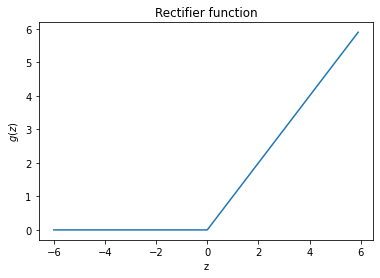

In [ ]:
def rectifier(z):
    return np.maximum(0, z)

z = np.arange(-6, 6, 0.1)
g_z = rectifier(z)
plt.plot(z, g_z)
#plt.axvline(x=0.0, color='k', alpha=0.5)
#plt.axhline(y=0.0, color='k', alpha=0.5)
plt.title('Rectifier function')
plt.xlabel('z')
plt.ylabel(r'$g (z)$')
plt.show()

Applying this function to the output of a linear transformation yields a nonlinear function. However, the function remains close to be linear, in the sense that it is a **piecewise linear function**.

Regarding the choice of the activation function, some properties are desirable:
- **Nonlinear**: using a nonlinear activation function, then a two-layer neural network can be proven to be a universal function approximator ([Universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)). The identity activation function $f(z)=z$ doesn't satisfy this property. When multiple layers use the identity activation function, then the entire network can be reduced to a single-layer model.
- **Continuously differentiable**: in order to enable gradient-based optimization methods. For example, the binary step function (used by the Perceptron) is not differentiable at 0, so gradient methods can make no progress with it. The ReLU is also non-differentiable at 0, anyway it is differentiable anywhere else and the value of the derivative at zero can be arbitrarily chosen to be 0 or 1.
- **Monotonic**: when the activation function is monotonic, the error surface associated with a single-layer model is guaranteed to be convex.
- **Smooth functions with a monotonic derivative**: these have been shown to generalize better in some cases.
- **Approximates identity near the origin**: when activation functions have this property, the neural network will learn efficiently when its weights are initialized at small random values. When the activation function does not approximate identity near the origin, special care must be used when initializing the weights.

When building a neural network, avoid using the sigmoid activation function, except for the output layer if we are doing binary classification, since the hyperbolic tangent $g(z) = tanh(z)$ is strictly superior to it. The standard activation function which is typically used is the ReLU or, in some cases, the leaky ReLU.

# Multi-layer networks
The term *network* comes to the fact that multiple functions are composed together in a model resulting into a **directed acyclic graph**. For example, we may have 3 functions $f^{(1)}, f^{(2)}, f^{(3)}$ composed together in a chain to form $f(\mathbf{x}) = f^{(3)}\left( f^{(2)} \left( f^{(1)}(\mathbf{x})\right)\right)$. The *i*-th function is called the *i*-th **layer** and the length of the chain gives the **depth** of the model. The final layer is the **output layer**. The training data provides us noisy examples of $f^*(\mathbf{x})$ evaluated at different points. Those training examples specify what the output layer should produce for each input $\mathbf{x}$, anyway, they don't specify what the behavior of the intermediate layers should be. It is the task of the learning algorithm to regulate their behaviour. Because the training data doesn't show the desired output of each of these layers, they are called **hidden layers**. A layer can be thought either as a vector-to-vector function or as many units acting in parallel, each representing a vector-to-scalar function (a single neuron).

Linear models, such as linear regression or logistic regression can be fit efficiently, either in closed form or with convex optimization. Anyway, they have the defect to limit the model capacity to linear functions. In order to extend its capacity to nonlinear functions of $\mathbf{x}$, instead of applying the linear model to $\mathbf{x}$, we can apply it to a transformed input $g(\mathbf{x})$ where $g$ is a nonlinear function defining a hidden layer and providing a new representation of $\mathbf{x}$. In feedforward neural nets we have a model $y=f(x;\theta, w) = g(x;\theta)^\top w$ where the parameters $\theta$ are used to learn $g$ from a broad class of functions (that class has to be chosen and this is not trivial at all).

Similarly to linear models, the optimizer, the cost function and the form of the output units still still have to be chosen. Furthermore, since feedforward networks introduced the concept of hidden layers, we must also choose the activation functions that will be used to compute the weights of the hidden layers.

The kind of functions that can be learned depends on the width and depth of the network:
- **Boolean functions:** every boolean function can be represented with a 2 layers network (1 hidden layer + 1 output layer, where the output layer consists of one unit with boolean output). In the worst case the number of units can be exponential in the number of inputs.
- **Continuous function:** Every bounded function can be approximated with arbitrarily small error by a network with two layers (1 hidden layer + 1 output layer, where the output is unthresholded) of units. The number of hidden units depends on the function.
- **Arbitrary functions:** Any function can be approximated to arbitrary accuracy by a network with three layers (2 hidden layers + 1 output layer) of units and unthresholded output. The number of required units is unknown.

## Learning a XOR function
The truth table of the XOR function is:

| x1 | x2 | XOR |
|:--:|:--:|:---:|
|  0 |  0 |  0  |
|  0 |  1 |  1  |
|  1 |  0 |  1  |
|  1 |  1 |  0  |

We can treat this problem as a regression problem using the MSE as the loss function (in general, we should not use MSE as a cost function for modelling binary data, but prefer the _logit_ function as we've seen in the chapter about logistic regression).

$$J(\theta) = \sum_{x\in \mathbb{X}}{\left(f^*(x) - f(x;\theta) \right)^2}$$

If we choose $f(x;\theta)$ to be a linear model $f(x;\theta) = \mathbf{w}^\top x + b$ with $\mathbf{w}\in \mathbb{R}^2$ and $b \in \mathbb{R}$, and solve the normal equations, we would end up with $\mathbf{w} = \mathbf{0}$ and $b=\frac{1}{2}$, that is a model that always predict $y = \frac{1}{2}$. We have to use a nonlinear model that is able to learn a different feature space in which a linear model can represent the solution.

Let's then introduce an intermediate layer containing two units resulting in a vector of hidden units $h$ that are computed by $h = f^{(1)}\left(x; W,c\right)$. The output layer will be a linear regression model $y = f^{(2)}\left(h; w, b\right) = w^\top h + b$, but acting on $h$ instead of $x$, a representation of the input in a new feature space. The entire network is represented by $f\left(\mathbf{x}; \mathbf{W},\mathbf{c},\mathbf{w},b\right) = f^{(2)}\left(f^{(1)}(\mathbf{x})\right)$ where $f^{(1)}$ has to be nonlinear, otherwise the network would result in a linear function of the input $x$, being unable to learn a XOR function.

As we've seen before, a ReLU unit might come to our aid by combining the input in an affine trasformation (obtaining the net input) that will then be fed to a nonlinear function (the rectifier). Then, let $h=g\left(W^\top x + c\right)$ where $W$ is a matrix containing the weights of the linear trasformation and $c$ the biases (which is a vector, because the affine transformation is from a vector $x$ to a vector $h$). The activation function is typically appliable element-wise, with $h_i = g\left(x^\top W_{:,i} + c_i \right)$, we'll use the rectifier activation function $g(z)=\max\left\{0,z\right\}$. The full network is:

$$f\left(\mathbf{x}; \mathbf{W},\mathbf{c},\mathbf{w},b\right) = \mathbf{w}^\top \max\left\{0,\mathbf{W}^\top \mathbf{x} + \mathbf{c}\right\} + b $$

and it has the following structure:

<img src="images/neural_networks/XOR_net.png" style="width:15em; display: block; margin-left: auto; margin-right: auto;"/>

Now we can manually specify the solution to the XOR problem letting:

$$W = \begin{bmatrix}1 & 1 \\ 1 & 1 \end{bmatrix} \qquad c = \begin{bmatrix}0\\ -1 \end{bmatrix} \qquad  w=\begin{bmatrix}1\\ -2 \end{bmatrix} \qquad b=0$$

In [ ]:
# inputs and parameters
X = np.matrix([(0,0),(0,1),(1,0),(1,1)])
W = np.ones((2,2))
c = np.array([0,-1])
w = np.array([1,-2])
b = 0

# computations of the network
net_input = X @ W + c
h = rectifier(net_input)
y = h.dot(w).T + b

# visualize outputs
for x, combination, activation, output in zip (X,net_input, h, y):
    print('x={}, net_input={}, h={}, y={}'.format(x, combination, activation, output.item()))

x=[[0 0]], net_input=[[ 0. -1.]], h=[[0. 0.]], y=0.0
x=[[0 1]], net_input=[[1. 0.]], h=[[1. 0.]], y=1.0
x=[[1 0]], net_input=[[1. 0.]], h=[[1. 0.]], y=1.0
x=[[1 1]], net_input=[[2. 1.]], h=[[2. 1.]], y=0.0


In real problems, instead of manually choosing parameters values, they are found by a gradient-based optimization algorithm.

In the following plots we can see how the inputs are mapped from the original feature space, in which they weren't linearly separable, to a new feature space by the hidden layer computation, where they can be perfectly separated by a suitable linear model.

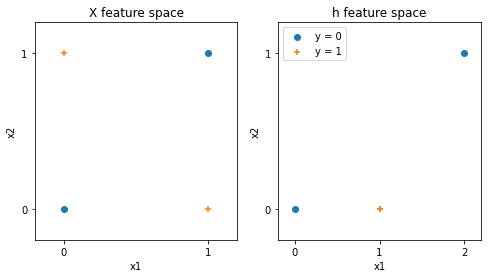

In [ ]:
# Visualize feature spaces
X1 = np.array(X[:,0])
X2 = np.array(X[:,1])
h1 = np.array(h[:,0])
h2 = np.array(h[:,1])
y = np.array(y)
markers = ('o', '+')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

for idx, cl in enumerate(np.unique(y)):
    ax1.scatter(X1[y == cl], X2[y == cl], marker = markers[idx], label='y = {}'.format(int(cl)))
    ax2.scatter(h1[y == cl], h2[y == cl], marker = markers[idx], label='y = {}'.format(int(cl)))

margin = 0.2
ax1.set_title('X feature space')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_xticks([0,1])
ax1.set_yticks([0,1])
ax1.set_xlim([0-margin, 1+margin])
ax1.set_ylim([0-margin, 1+margin])

ax2.set_title('h feature space')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xticks([0,1,2])
ax2.set_yticks([0,1])
ax2.set_xlim([0-margin, 2+margin])
ax2.set_ylim([0-margin, 1+margin])
ax2.legend(loc='upper left')

plt.show()

## Visual interpretation
The goal of the following explanation is to provide an insight on what is the meaning of composing multiple neurons into a network, without any mathematical rigor. In order to obtain a nonlinear model we can take, for example, two sigmoid units, each of which assigns a probability to each data point, and sum those probabilities together, point by point, obtaining new values that have to be rescaled back between 0 and 1 (and that can be done with another sigmoid function). If we want to give more importance to one of the two units, we can take a linear combination of the two, instead of simply summing them together, and we also add a bias term (otherwise the resulting value would always be positive and, if fed to a sigmoid unit, would result in always being classified as positive).

<img src="images/neural_networks/visual_network.png" style="width:42em; display: block; margin-left: auto; margin-right: auto;" />

which is equivalent this neural network:

<img src="images/neural_networks/visual_network_2.jpg" style="width:20em; display: block; margin-left: auto; margin-right: auto;" />

## Generalization and vectorized notation
From now on, I will use the following [notation](https://cs230.stanford.edu/files/Notation.pdf):
- superscript $(i)$: *i*-th training example
- superscript $[l]$: *l*-th layer
- $m$: number of examples in the dataset
- $n_x$: number of input units
- $n_{h}^{[l]}$: number of units in the *l*-th hidden layer
- $n_y$: number of output units (or number of classes)
- $L$: number of layers in the network
- $x^{(i)}\in \mathbb{R}^{n_x}$ is the i-th training example represented as a column vector
- $X\in \mathbb{R}^{n_x \times m}$: input matrix (the *i*-th column correspond to the i-th training example)
- $Y\in \mathbb{R}^{n_y \times m}$ is the label matrix
- $y^{(i)}\in \mathbb{R}^{n_y}$ is the output label for the *i*-th example
- $b^{[l]}\in \mathbb{R}^{n^{[l+1]}}$: bias vector in the *l*-th layer
- $\hat{y}\in \mathbb{R}^{n_y}$: predicted output vector
- $w_{ji}^{[l]}$: single weight of the *l*-th layer, from unit i into unit j
- $W^{[l]} \in \mathbb{R}^{n^{[l+1]} \times n^{[l-1]}}$: the weight matrix associated with the *l*-th layer
- $a_j^{[l]}$: the output of the *j*-th neuron of the l-th hidden layer
- $g^{[l]}$: the activation function of the *l*-th layer

### Example
Consider this network with $n_x=3$ inputs in the input layer, 1 hidden layer with $n_h^{[1]}=2$ units and an output layer with $n_y=1$ output unit:

<img src="images/neural_networks/notation.png" style="width:25em; display: block; margin-left: auto; margin-right: auto;" />

where 

$$W^{[1]}= \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{bmatrix}, \qquad 
W^{[2]}= \begin{bmatrix} w_{11} & w_{12} \end{bmatrix}, \qquad
a^{[1]} = \begin{bmatrix} a_{1}^{[1]} \\ a_{2}^{[1]} \end{bmatrix}, \qquad
a^{[2]} = \begin{bmatrix} a_1^{[2]} \end{bmatrix}$$

In this representation the bias terms are omitted and they have to be considered implicitly inside each neuron. For a single input data $x^{(i)}$ the computation will proceed as follows:

$$
a^{[1](i)} = g\left(W^{[1]}x^{(i)} + b^{[1]} \right), \qquad
\hat{y} = a^{[2](i)} = g\left(W^{[2]}a^{[1](i)} + b^{[2]} \right)
$$


We can use a vectorized notation to represent $m$ input data $x^{(i)}$ inside $X$:

$$
X = \begin{bmatrix}
| & | & | \\
x^{(1)} & \dots & x^{(m)} \\
| & | & | \\
\end{bmatrix} \in \mathbb{R}^{3 \times m}
$$

The computation will proceed in this way:

$$
A^{[1]} = g\left(W^{[1]}X + b^{[1]} \right) \in \mathbb{R}^{2\times m}, \qquad
\hat{y} = A^{[2]} = g\left(W^{[2]}A^{[1]} + b^{[2]} \right) \in \mathbb{R}^{1\times m}
$$

**Note:** this is a slightly imprecise notation, since dimensions of $W^{[i]}A^{[i-1]}$ and $b^{[i]}$ are not compatible. We have to think at the vector $b^{[i]}$ being summed to each of the columns of the matrix $W^{[i]}A^{[i-1]}$. This is called **array broadcasting** and [numpy is able to handle that](https://numpy.org/doc/stable/user/theory.broadcasting.html#array-broadcasting-in-numpy) for us.


# The Backpropagation Algorithm

The main difference between linear models and neural networks is that the nonlinearity of neural network causes the loss function to become **non-convex**. Consequently, stochastic gradient descent applied to such type of functions has not convergence guarantee and is sensitive to the initial values of the parameters. Sticking to the previous example, the cost function will be:

$$J\left(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]} \right) = \frac{1}{m} \sum_{i=1}^{m} \mathcal{L}\left(\hat{y}, y\right)$$

where, $\mathcal{L}$ is the *loss function* that, in case of a binary classification problem, can be the logistic cost function (or log-likelihood function) $\mathcal{L}(\hat{y}^{(i)}, y^{(i)}) = {-y^{(i)}\ln{\hat{y}^{(i)}} - (1-y^{(i)})\ln{\left(1-\hat{y}^{(i)}\right)}}$ that we already defined in the chapter about logistic regression, and $\hat{y}^{(i)} = a^{[2]}$ is the output predicted by the network associated to the *i*-th input.

Proceed to minimize $J$ with the gradient descent algorithm that we already know, using **backpropagation** or **reverse mode automatic differentiation (autodiff)**, in order to compute the gradients of the loss function: 

1. Inizialize weights to small random values.

2. Repeat until the *termination condition* is met:  
    - compute the prediction $\hat{y}^{(i)}$ for each input ($i=1,...,m$)
    - compute the gradient $\nabla J=\left(\frac{\partial J}{\partial W^{[1]}}, \frac{\partial J}{\partial b^{[1]}}, \frac{\partial J}{\partial W^{[2]}}, \frac{\partial J}{\partial b^{[2]}} \right)$ of the cost function with respect to the parameters. Let then be: $\text{d}W^{[1]}=\frac{\partial J}{\partial W^{[1]}}$, $\text{d}b^{[1]}=\frac{\partial J}{\partial b^{[1]}}$, $\text{d}W^{[2]}=\frac{\partial J}{\partial W^{[2]}}$, $\text{d}b^{[2]}=\frac{\partial J}{\partial b^{[2]}}$.
    - update each parameter value according to the learning rate $\eta$:  
        - $W^{[1]} \leftarrow W^{[1]} - \eta \text{d}W^{[1]}$
        - $b^{[1]} \leftarrow b^{[1]} - \eta \text{d}b^{[1]}$
        - $W^{[2]} \leftarrow W^{[2]} - \eta \text{d}W^{[2]}$
        - $b^{[2]} \leftarrow b^{[2]} - \eta \text{d}b^{[2]}$

Possible **termination conditions** are:
- maximum number of iterations (also called **epochs**)
- error below a threshold
- error on a separate validation set below some threshold

In practice, it is quite common to use stochastic or mini-batch gradient descent. Therefore, at each epoch, we may want to sample a single instances or a batch of fixed size of instances from the training set. In that case, the cost function has to be computed according to the method used (average over the number of training sample in the batch).

The tricky part is how to compute these partial derivatives because $\hat{y}^{(i)}$ is obtained by a combination of functions. In order to compute them, we need to use the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) of calculus.

$\text{d}a^{[2]} = \frac{\partial J}{\partial a^{[2]}} = \frac{\partial J}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}}$

Assuming that $\sigma(z^{[2]})$ is a sigmoid function, then its derivative with respect to $z^{[2]}$ is $\sigma(z^{[2]})\left(1-\sigma(z^{[2]})\right) = a^{[2]}\left(1-a^{[2]}\right) $.

$
\begin{split}
\text{d}z^{[2]} = \frac{\partial J}{\partial z^{[2]}} = \frac{\partial J}{\partial a^{[2]}} \frac{\partial a^{[2]}}{\partial z^{[2]}} 
&= \text{d}a^{[2]} \cdot \sigma(z^{[2]})\left(1-\sigma(z^{[2]})\right) \\
&= \text{d}a^{[2]} \cdot a^{[2]}\left(1-a^{[2]}\right) \\
&= \left( -\frac{y}{a^{[2]}} + \frac{1-y}{1-a^{[2]}} \right) a^{[2]}\left(1-a^{[2]}\right) \\
&= a^{[2]} - y
\end{split}
$

$
\begin{split}
\text{d}W^{[2]} = \frac{\partial J}{\partial W^{[2]}} = \frac{\partial J}{\partial z^{[2]}} \frac{\partial z^{[2]}}{\partial W^{[2]}} &= \text{d}z^{[2]} a^{[1]\top} \\
&= \left(a^{[2]} - y\right) a^{[1]\top}
\end{split}
$

$
\text{d}b^{[2]} = \frac{\partial J}{\partial b^{[2]}} = \frac{\partial J}{\partial z^{[2]}} \frac{\partial z^{[2]}}{\partial b^{[2]}} = \text{d}z^{[2]} = a^{[2]} - y
$

$
\text{d}a^{[1]} = \frac{\partial J}{\partial a^{[1]}} = \frac{\partial J}{\partial z^{[2]}} \frac{\partial z^{[2]}}{\partial a^{[1]}} = W^{[2]\top} \text{d}z^{[2]} = W^{[2]\top} \left(a^{[2]} - y\right)
$

Assuming that $g$ is a generic activation function:

$
\begin{split}
\text{d}z^{[1]} = \frac{\partial J}{\partial z^{[1]}} = \frac{\partial J}{\partial a^{[1]}} \frac{\partial a^{[1]}}{\partial z^{[1]}} &= \text{d}a^{[1]} * g' \left(z^{[1]}\right) \\
&= W^{[2]\top} \text{d}z^{[2]} * g' \left(z^{[1]}\right)
\end{split}
$

where $*$ is an element-wise product.

$
\text{d}W^{[1]} = \frac{\partial J}{\partial W^{[1]}} = \frac{\partial J}{\partial z^{[1]}} \frac{\partial z^{[1]}}{\partial W^{[1]}} = \text{d}z^{[1]} x^\top
$

$
\text{d}b^{[1]} = \frac{\partial J}{\partial b^{[1]}} = \frac{\partial J}{\partial z^{[1]}} \frac{\partial z^{[1]}}{\partial b^{[1]}} = \text{d}z^{[1]}
$

## Backpropagation with vectorized input
Now let's consider the input training examples all at once in the input matrix $X\in \mathbb{R}^{3\times m}$ (please, note that, in practice, we rarely will consider the entire training set all at once, but we will consider mini batches of training instances). The computations of the hidden layer become $Z^{[1]}=W^{[1]} X + b^{[1]}$ and $A^{[1]}=g\left(Z^{[1]}\right)$. 

The partial derivatives become:

- $\text{d}Z^{[2]} = A^{[2]} - Y$
- $\text{d}W^{[2]} = \frac{1}{m} \text{d}Z^{[2]} A^{[1]\top} $
- $\text{d}b^{[2]} = \frac{1}{m} \texttt{np.sum}\left(\text{d}Z^{[2]}, \texttt{axis}=1, \texttt{keepdims}=True \right)$
- $\text{d}Z^{[1]} = W^{[2]\top} \text{d}Z^{[2]} * g' \left(Z^{[1]}\right)$ (in which $*$ is the-element wise product between element of two matrices with dimension $n^{[1]}\times m$)
- $\text{d}W^{[1]} = \frac{1}{m} \text{d}Z^{[1]} X^\top $
- $\text{d}b^{[1]} = \frac{1}{m} \texttt{np.sum}\left(\text{d}Z^{[1]}, \texttt{axis}=1, \texttt{keepdims}=True \right)$

## What happens in each layer?
More generally, at every iteration, during the *forward propagation*, the *l*-th layer receive as input and compute as output these quantities:
- **Input:** 
    - $A^{[l-1]}$
- **Output:**  
    - $Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}\quad$ (this is a sort of cached quantity that will return useful during backpropagation)
    - $A^{[l]} = g^{[l]}\left(Z^{[l]}\right)$
    
During the *backpropagation* process, the *l*-th layer receive as input and compute as output these quantities:
- **Input:** 
    - $\text{d}A^{[l]}$
- **Output:**  
    - $\text{d}Z^{[l]} = \text{d}A^{[l]} * {g'}^{[l]} \left(Z^{[l]}\right)\quad$ (where $*$ stands for the element wise product)
    - $\text{d}W^{[l]} = \frac{1}{m} \text{d}Z^{[l]} \cdot A^{[l-1]\top}$
    - $\text{d}b^{[l]} = \frac{1}{m} \texttt{np.sum}\left(\text{d}Z^{[l]}, \texttt{axis}=1, \texttt{keepdims}=True\right)$
    - $\text{d}A^{[l-1]} = W^{[l]\top} \cdot \text{d}Z^{[l]}$
    
<img src="images/neural_networks/iteration.png" style="width:18em; display: block; margin-left: auto; margin-right: auto;" />


## Initialization
Weights of a neural network should not be initialized to zero, but to small random number. I'll try to illustrate it with an example. Consider this 2-layers neural network.

<img src="images/neural_networks/initialization.png" style="width:25em; display: block; margin-left: auto; margin-right: auto;" />

Suppose that the weights are initialized at zero:

$$W^{[1]} = \begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix}, \qquad b^{[1]} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \qquad W^{[2]} = \begin{bmatrix} 0 & 0  \end{bmatrix}, \qquad b^{[2]} = 0$$

Initializing $b^{[i]}$ at zero is not a problem, but it is a problem if $W^{[i]}$ is. The first thing we may notice is that $a_1^{[1]} = a_2^{[1]}$. When computing backpropagation, it will happen that also $\text{d}z_1^{[1]} = \text{d}z_2^{[1]}$ and so, both the units of the hidden layer will stay always equal. This can be proven by induction since $\text{d}W^{[1]}$, at every iteration, will look like:

$$\text{d}W^{[1]} = \begin{bmatrix} u & v \\ u & v \end{bmatrix}$$

leaving $W^{[1]}$ being a matrix with two identical rows. For this reason, having more than 1 hidden unit wouldn't make any sense, since they would all be computing the same value, no matter how long we let gradient descent run.

We can randomly initialize the weights in this way:

```python
W1 = np.random.randn((2,2)) * 0.01
b1 = np.zeros((2,1))
W2 = np.random.randn((1,2)) * 0.01
b2 = 0
```

The reason why it is preferrable to initialize weights to small values rather than large ones, is that if we're using an activation function like the sigmoid or the hyperbolic tangent, then is better if its input (a weighted sum) is not too large, otherwise we would find ourselves in a region of the activation function where its slope (its derivative) is close to zero, causing the convergence of the gradient descent process to slow down (since gradient descent would take very short steps towards a minimum point).

## Best practices
Backpropagation can fail in some cases, for example:
- **Vanishing gradients**: the gradients for the layers closer the input can become very small, near zero, leading to the multiplication of many small terms between them. If that's the case, then the training process for these layers become very slow. Using **ReLU** units instead of sigmoid units **can help prevent vanishing gradients**.
- **Exploding gradients**: this is the opposite problem, in which the gradients of the lower layers can become very large  not being able to converge. Lowering the learning rate or adopting [batch normalization](https://en.wikipedia.org/wiki/Batch_normalization) can help prevent exploding gradients.
- **Dead ReLU neurons**: if the input (which is a weighted sum) to a ReLU unit falls under 0, then the unit can get stuck because it keeps outputting 0, contributing nothing to the network's final prediction and gradients not being able to flow through it during backpropagation. By cutting off some gradients, the input to the ReLU unit may not ever change enough to bring the weighted sum back above 0. Lowering the learning rate can prevent the death of ReLU units.
- **Dropout regularization**: [dropout regularization](http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf) is a form of regularization which is useful for neural networks. It works by removing a random selection of a fixed number of a network layer's units for a single gradient step. This is analogous to training the network to emulate an exponentially large ensemble of smaller networks. A regularization factor of 0 correspond to no regularization at all, while a regularization factor of 1 correspond to dropping out every unit, in this case the model learns nothing at all. So, we will choose values between 0 and 1.


### Euristics to escape local minima

There exist several euristics that can be used to avoid getting stuck in local minima. For example we can include a **weight momentum** in the weight update:

$$W^{[1]} \leftarrow W^{[1]} - \eta \text{d}W^{[1]} - \alpha \text{d}W^{[1]}(t-1)$$

where the last term $\text{d}W^{[1]}(t-1)$ represents the weight update term of the previous iteration, rescaled by a factor $\alpha$.